In [27]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
from matplotlib import style
import locale

locale.setlocale(locale.LC_ALL, "en_US")
style.use("seaborn-ticks")

In [2]:
otc = pd.read_csv("./options.csv")
otc.index = otc.Period
otc.drop("Period", 1, inplace=True)
otc.index = [datetime.strptime(date, "%b-%y") for date in otc.index]

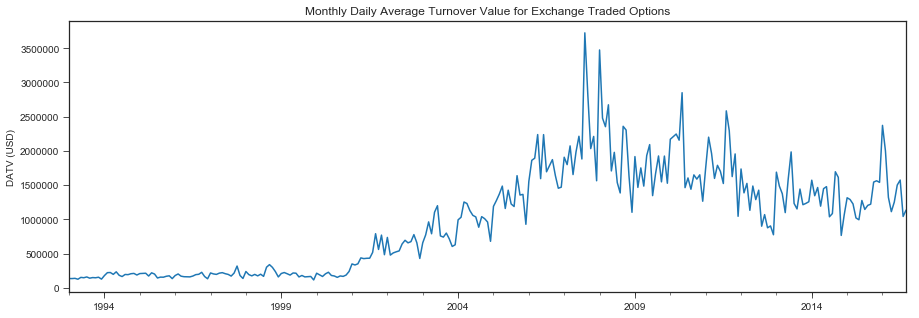

In [56]:
plt.figure(figsize=(15, 5))
otc.DATV.plot()
plt.title("Monthly Daily Average Turnover Value for Exchange Traded Options")
plt.ylabel("DATV (USD)")
plt.show()

In [30]:
# DATV for 2015
datv_2015 = otc.ix[otc.DATV.index.year == 2015]
locale.format("%d", datv_2015.mean(), grouping=True)

'1,278,571'

In [42]:
# DATV for last 4 years
otc["years"] = otc.index.year
otc.groupby("years").mean()[-4:]

,DATV
years,
2013,1396190
2014,1313737
2015,1278571
2016,1479360


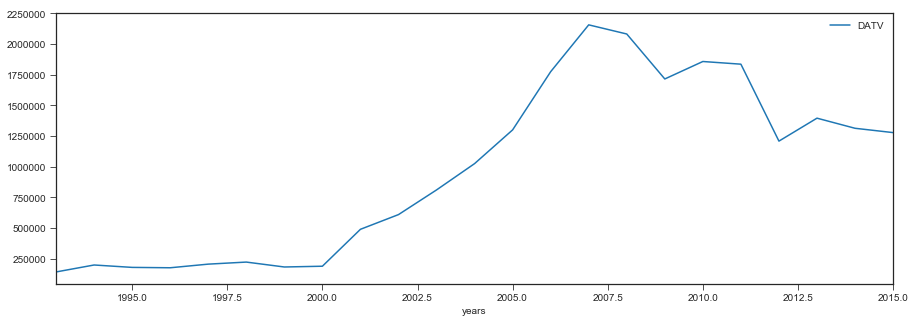

In [46]:
otc.groupby("years").mean()[:-1].plot(figsize=(15, 5))
plt.show()

In [55]:
## Peak DATV for ETOs
otc.ix[otc.DATV == max(otc.DATV)]

,DATV,years
2007-08-01,3725273,2007
